## Pré-processamento de dados  - Breast Cancer dataset

* https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Métricas
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)
from sklearn.metrics import classification_report

# Seleção de características
from sklearn.feature_selection import (mutual_info_classif,
                                       f_classif,
                                       SelectKBest)

In [ ]:
##### Bibliotecas externas

# Plotar o diagram de Venn
!pip install venn

# Feature Importance
!pip install shap

### Carrega a base

In [ ]:
def carregaBaseDados(nome):
  return pd.read_csv(nome)

### Pré-processamento

In [ ]:
def preProcessamento(dataframe):
  # Remove sample_id e Unnamed: 32
  dataframe.drop(['id'], axis=1, inplace=True)
  dataframe.drop(['Unnamed: 32'], axis=1, inplace=True)

  # Obtém nome das colunas numéricas
  scaler_cols = dataframe.select_dtypes(include=['int64', 'float64']).columns
  # Aplica normalização
  scaler = StandardScaler()
  ajuste = scaler.fit(dataframe[scaler_cols])
  dataframe[scaler_cols] = ajuste.transform(dataframe[scaler_cols])

  # Transforma os dados categóricos de diagnosis
  labelencoder = LabelEncoder()
  dataframe['diagnosis'] = labelencoder.fit_transform(dataframe['diagnosis'])

### Separação entre treino e teste

In [ ]:
# Separa atributos da classe (X,y)
def separaClasse(dataframe):
  X = dataframe.drop(['diagnosis'], axis = 1)
  y = dataframe['diagnosis']
  return X,y

In [ ]:
# Separa os conjuntos em treino e teste (70%/30%)
def separaTreinoTeste(X, y):
  return train_test_split(X,y, test_size=0.3)

### Modelo preditivo

In [ ]:
# Gera o modelo preditivo
def geraModelo(modelo, X,y):
  # modelo = 'DecisionTreeClassifier()'
  modelo = eval(modelo)
  modelo.fit(X,y)
  return modelo

### Métricas

In [ ]:
def geraMetricas(y_test, y_pred):
  # Acuracidade
  print("ACC: %.3f" %(accuracy_score(y_test,y_pred)))
  #Revocação
  print("Recall :%.2f" %(recall_score(y_test,y_pred)))
  #Precisão
  print("Precision :%.2f" %(precision_score(y_test,y_pred)))
  #F1-score
  print("F1-score :%.2f" %(f1_score(y_test,y_pred)))


In [ ]:
def metricaReport(y_test, y_pred):
  print(classification_report(y_test, y_pred))

## Seleção de Características

In [ ]:
def geraMapaCalor(dataframe):
  plt.figure(figsize = (15, 10))
  sns.heatmap(dataframe.corr(), cmap = 'Blues')
  plt.title("Correlações entre os atributos", size = 20)
  plt.show()

In [ ]:
# Faz a escolha das melhores características
# a partir de método estatístico
def kBestFeatures(metodo, size, X, y):
  kBest = SelectKBest(metodo, k = size)
  kBest.fit(X,y)
  return kBest

In [ ]:
# Verifica os nomes das colunas selecionadas
def getFeaturesName(selBestModel, X):
  return X.columns[selBestModel.get_support()]

In [ ]:
# Aplica a transformação (Redução) no conjunto Treino e Teste
def changeData(selBestModel, X):
  return selBestModel.transform(X)


### Realizando testes com os dados:

In [ ]:
# Gera o dataframe
df = carregaBaseDados('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Aplica pré-processamento
preProcessamento(df)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

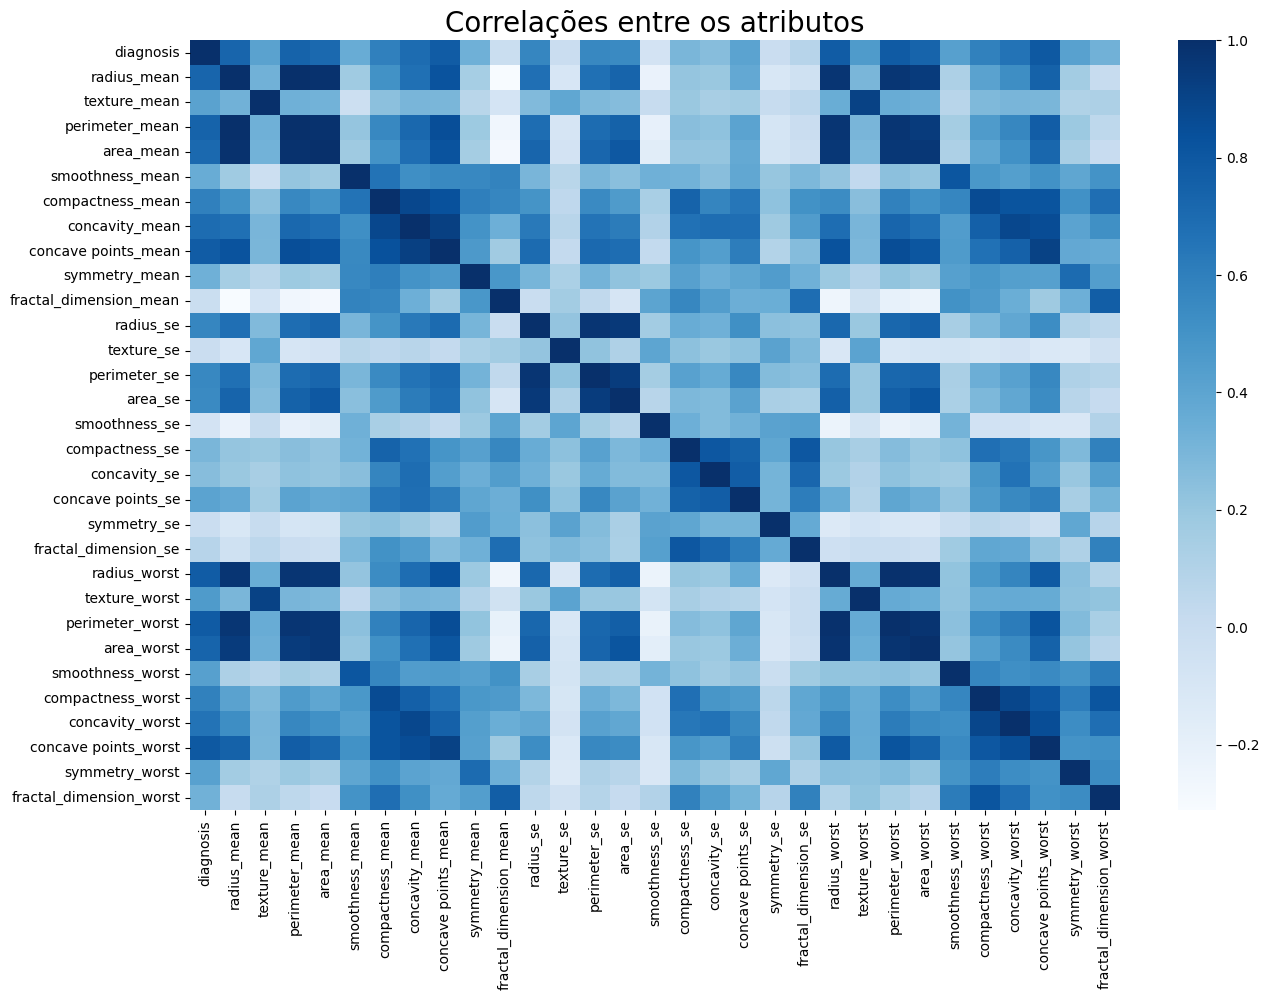

In [ ]:
# Avalia as correlações entre os atributos
geraMapaCalor(df)

In [ ]:
# Separa atributos e classe
X,y = separaClasse(df)

In [ ]:
# Gerar conjunto treino e teste
X_train, X_test, y_train, y_test = separaTreinoTeste(X, y)

In [ ]:
# Avalia os dados
modelo  = geraModelo('DecisionTreeClassifier()', X_train, y_train)
score = modelo.score(X_test, y_test)
y_pred = modelo.predict(X_test)
print(score)

0.9298245614035088


In [ ]:
# Avalia o modelo com mais métricas
geraMetricas(y_test, y_pred)

ACC: 0.930
Recall :0.94
Precision :0.89
F1-score :0.92


Mutual Information

In [ ]:
# Seleciona as k melhores características
# Utiliza a abordagem Mutual Information
selKBest = kBestFeatures(mutual_info_classif, 10, X_train, y_train)

In [ ]:
# Armazena o nome das características selecionadas
features_MutualInfo = getFeaturesName(selKBest, X_train)

In [ ]:
features_MutualInfo

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave points_worst'],
      dtype='object')

In [ ]:
# Transforma a base de dados apenas com as melhores características
New_X_train = changeData(selKBest, X_train)
New_X_test = changeData(selKBest, X_test)

In [ ]:
# Re-treinar o classificador com a base reduzida
modelo  = geraModelo('DecisionTreeClassifier()', New_X_train, y_train)
score = modelo.score(New_X_test, y_test)
y_pred = modelo.predict(New_X_test)
print(score)

0.9181286549707602


In [ ]:
geraMetricas(y_test, y_pred)

ACC: 0.918
Recall :0.88
Precision :0.91
F1-score :0.90


ANOVA

In [ ]:
# Seleciona as k melhores características
# Utiliza a abordagem ANOVA
selKBest = kBestFeatures(f_classif, 10, X_train, y_train)

In [ ]:
# Armazena o nome das características selecionadas
features_ANOVA = getFeaturesName(selKBest, X_train)

In [ ]:
features_ANOVA

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

In [ ]:
# Transforma a base de dados apenas com as melhores características
New_X_train = changeData(selKBest, X_train)
New_X_test = changeData(selKBest, X_test)

In [ ]:
# Re-treinar o classificador com a base reduzida
modelo = geraModelo('DecisionTreeClassifier()', New_X_train, y_train)
score = modelo.score(New_X_test, y_test)
y_pred = modelo.predict(New_X_test)
print(score)

0.9473684210526315


In [ ]:
# Gera as métricas
geraMetricas(y_test, y_pred)

ACC: 0.947
Recall :0.91
Precision :0.95
F1-score :0.93


#### Similaridade das Features

In [ ]:
# Diagrama de Venn
from venn import venn

In [ ]:
features = {
    "Mutual Information": set(features_MutualInfo),
    "ANOVA": set(features_ANOVA),
}

In [ ]:
features

{'Mutual Information': {'area_mean',
  'area_se',
  'area_worst',
  'concave points_mean',
  'concave points_worst',
  'concavity_mean',
  'perimeter_mean',
  'perimeter_worst',
  'radius_mean',
  'radius_worst'},
 'ANOVA': {'area_mean',
  'area_worst',
  'concave points_mean',
  'concave points_worst',
  'concavity_mean',
  'concavity_worst',
  'perimeter_mean',
  'perimeter_worst',
  'radius_mean',
  'radius_worst'}}

<Axes: >

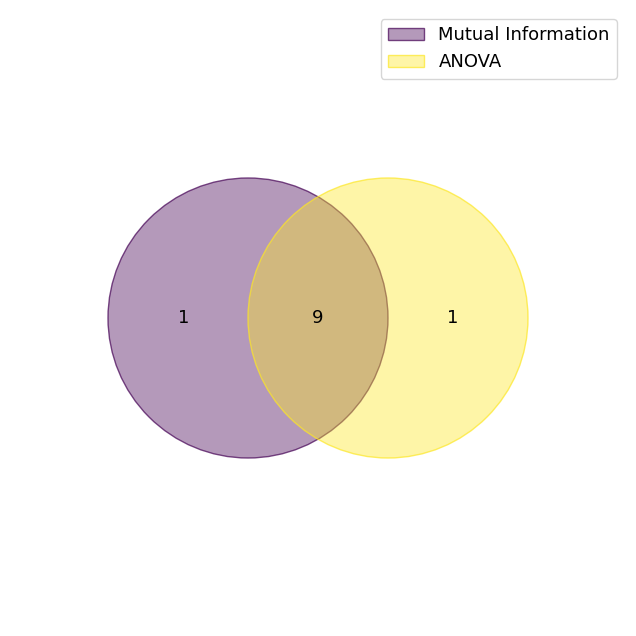

In [ ]:
venn(features)

In [ ]:
set(features_MutualInfo).intersection(features_ANOVA)

{'area_mean',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'perimeter_mean',
 'perimeter_worst',
 'radius_mean',
 'radius_worst'}

In [ ]:
set(features_MutualInfo).difference(features_ANOVA)

{'area_se'}

In [ ]:
set(features_ANOVA).difference(features_MutualInfo)

{'concavity_worst'}

### Feature Importance

In [ ]:
import shap

In [ ]:
modelo = geraModelo('DecisionTreeClassifier()', X_train, y_train)

In [ ]:
explainer = shap.Explainer(modelo.predict, X_train)
shap_values = explainer(X_train)

PermutationExplainer explainer: 399it [00:29, 12.76it/s]                         


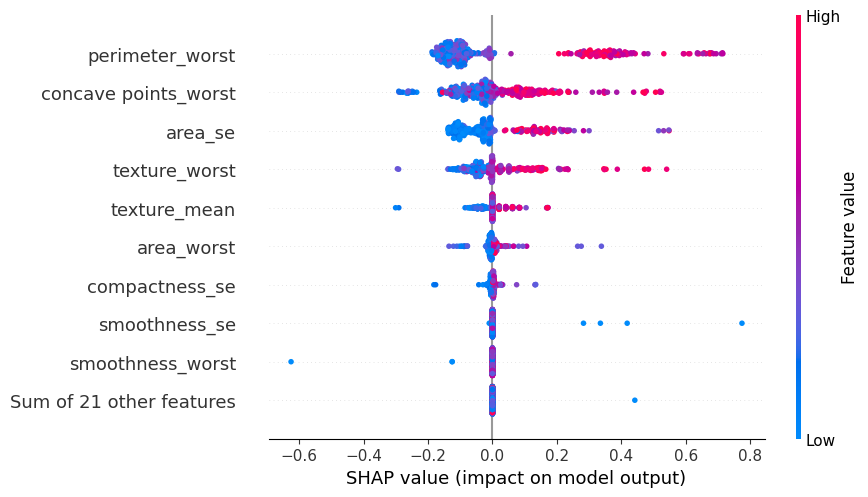

In [ ]:
shap.plots.beeswarm(shap_values, max_display = 10)

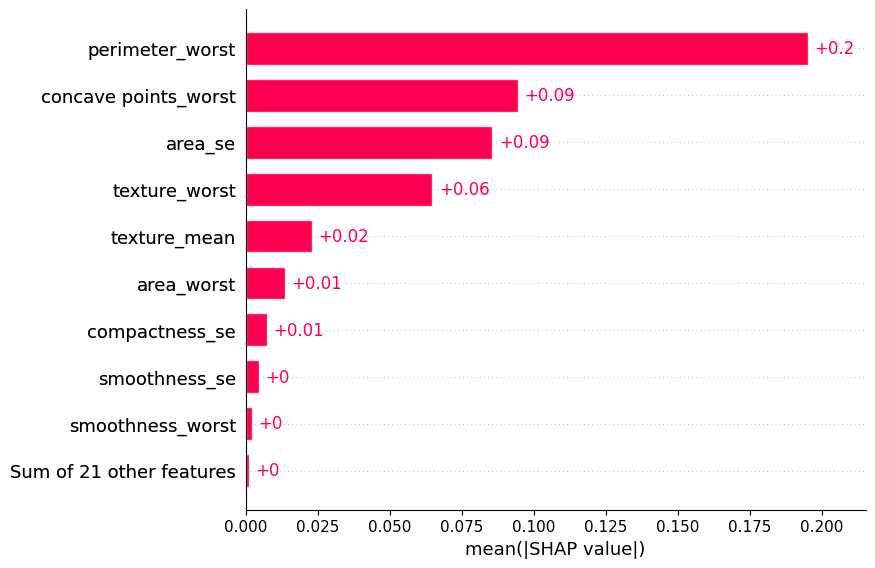

In [ ]:
shap.plots.bar(shap_values, max_display=10)

In [ ]:
shap.initjs()
shap.plots.force(shap_values)